# **Project 1 - Customer Churn **

**Objective:** To identify top 3 Churn Risk Pattern including Clean and EDA off dataset.

**Dataset:** Telco Customer Churn dataset (Kaggle, CC0 License)

# **Import and Dataset Load**

---



In [97]:
# Import necessaries modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline

In [54]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/data-analytics-portfolio-anurag/P1-Customer_Churn/data/raw_telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [55]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# 1. Exploratory Data Analysis (EDA) Step - Data Cleaning

###**1.1 Initial Data Exploration**

In [56]:
df.shape

(7043, 21)

In [57]:
# Columns/Features
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [58]:
df.rename(columns={
    'customerID':'customer_id',
    'SeniorCitizen':'sr_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_sercurity',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies':'streaming_movies',
    'Contract':'contract',
    'PaperlessBilling':'paperless_billing',
    'PaymentMethod':'payment_method',
    'MonthlyCharges':'monthly_charges',
    'TotalCharges':'total_charges',
    'Churn':'churn'},inplace=True)

In [59]:
df.dtypes

,0
customer_id,object
gender,object
sr_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_sercurity,object


In [60]:
# Identifying features which has missing values
print('Missing Values:-')
nMissingValues=0
for column in df.columns:
  if df[column].isnull().sum()>0:
    print(column + ': ', df[column].isnull().sum())
    nMissingValues +=1

if nMissingValues==0: print('No missing values found')

Missing Values:-
No missing values found


In [61]:
#df.describe()
df.describe(include='all')

,customer_id,gender,sr_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_sercurity,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [62]:
df.describe()

,sr_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [63]:
# Unique Values for each feature
print('Unique Values:-')
for column in df.columns: print(column + ' {' +str(df[column].nunique()) + '} : ', df[column].unique())


Unique Values:-
customer_id {7043} :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender {2} :  ['Female' 'Male']
sr_citizen {2} :  [0 1]
partner {2} :  ['Yes' 'No']
dependents {2} :  ['No' 'Yes']
tenure {73} :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
phone_service {2} :  ['No' 'Yes']
multiple_lines {3} :  ['No phone service' 'No' 'Yes']
internet_service {3} :  ['DSL' 'Fiber optic' 'No']
online_sercurity {3} :  ['No' 'Yes' 'No internet service']
online_backup {3} :  ['Yes' 'No' 'No internet service']
device_protection {3} :  ['No' 'Yes' 'No internet service']
tech_support {3} :  ['No' 'Yes' 'No internet service']
streaming_tv {3} :  ['No' 'Yes' 'No internet service']
streaming_movies {3} :  ['No' 'Yes' 'No internet service']
contract {3} :  ['Month-to-month' 'One y

### **Initial Data Assessment: Observations**

After loading the data and performing an initial exploration using `.head()`, `.info()`, `.describe(include='all')`, and `.nunique()`, we have identified some areas that require attention during the data cleaning and preprocessing phase.

**Summary of Findings:**

1.  **Dataset Size:** The dataset contains **7043 rows** and **21 columns**.

2.  **Missing Values:**
    *   None of the feature has missing values.

3.  **Data Type Inconsistencies:**
    *   `senior_citizen`: Considering the other features which have values in `Yes` and `No` format (`object`), this feature has values in **0** and **1** format (`int64` {0- No, 1-Yes}). To maintain consistency the data type of `senior_citizen` can be changed to `object` type.

    *   `tenure`: The data type to be changed to **int** to use the feature for further exploration.

    *   `monthly_charges`: The data type to be changed to **float** to use the feature for further exploration.

    *   `total_charges`: The data type to be changed to **float**.
    
4.  **Potential Data Quality Issues & Outliers:**
    *   `tenure`: The `min` value is **0** and `max` value is **72**. There are **73 unique entries**. The values can be distributed categorically.

  

###**1.2 Handling Duplicates**

In [64]:
#Duplicate Rows
df[df.duplicated()]

,customer_id,gender,sr_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_sercurity,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn


In [65]:
# Duplicate customer_id
df[df.duplicated('customer_id')]

,customer_id,gender,sr_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_sercurity,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn


### **Handling Duplicates: Summary**

1. After using `df.duplicated()` **no duplicate row** was found.

2. On further exploring duplicate `customer_id` using `df.duplicated('customer_id'), **no duplicate customer_id** was found.

###**1.3 Handling Data Types and Data**

**1.3.1 `sr_citizen` feature**

In [66]:
df['sr_citizen'].unique()

array([0, 1])

In [67]:
df['sr_citizen']=df['sr_citizen'].map({0:'No', 1:'Yes'})

In [68]:
df['sr_citizen'].unique()

array(['No', 'Yes'], dtype=object)

**1.3.2 `tenure` feature**

In [69]:
# Changing data type to int
df['tenure']=df['tenure'].astype(int)

**1.3.3 `monthly_charges` feature**

In [70]:
# Changing data type to float
df['monthly_charges']=df['monthly_charges'].astype(float)

**1.3.4 `total_charges` feature**

In [71]:
# Changing data type to float
#df['total_charges'].astype(float) - Threw error due to ' ' values


In [72]:
# Exploring the reason for above error
df[df['total_charges']==' ']

,customer_id,gender,sr_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_sercurity,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 rows where `total_charges` is not available. We need to replace `total_charges` for these rows with appropriate values.

In [73]:
#replacing tota_charges with 0 where it is not available
df['total_charges']=df['total_charges'].str.replace(' ','0')

In [74]:
# Changing data type to float
df['total_charges']=df['total_charges'].astype(float)

In [75]:
# Checking relationship among 'tenure', 'monthly_charges' and 'total_charges'
mask = ((df['tenure']*df['monthly_charges'])==df['total_charges'])
df.loc[mask, ['tenure','monthly_charges','total_charges']]

,tenure,monthly_charges,total_charges
0,1,29.85,29.85
20,1,39.65,39.65
22,1,20.15,20.15
27,1,30.20,30.20
33,1,20.20,20.20
...,...,...,...
6979,1,24.20,24.20
7010,1,74.45,74.45
7016,1,49.95,49.95
7018,1,70.65,70.65


In [76]:
mask_total_charges = (df['total_charges']==0)
df.loc[mask_total_charges, ['tenure','monthly_charges','total_charges']]
#df.loc[mask_total_charges]

,tenure,monthly_charges,total_charges
488,0,52.55,0.0
753,0,20.25,0.0
936,0,80.85,0.0
1082,0,25.75,0.0
1340,0,56.05,0.0
3331,0,19.85,0.0
3826,0,25.35,0.0
4380,0,20.00,0.0
5218,0,19.70,0.0
6670,0,73.35,0.0


From the above it is clear that `total_charges` is the `tenure`*`monthly_charges`. Hence `total_charges' for the 11 records can be updated accordingly. But the `Tenure` for these 11 record is **0**. Hence leaving these values to **0**.

### **Handling Data Types and Data: Summary**

1. `sr_citizen`: Using `map({0:'No', 1:'Yes'})`, **0 and 1** has been replaced with **No and Yes** sequentially.
    
2. `tenure`: The data type has been changed to **int** using `astype()`.

3. `monthly_charges`: The data type has been changed to **float** using `astype()`.

4. `total_charges`: The data type has been changed to **float** using `astype()`. While updating data type, it was found that there are **11 records** where value of `total_charges` is **not available**. The value of `tenure` feature is also **0**. Hence value of `total_charges` for these 11 records have been update to **0**.

###**1.4 Univariate Analysis - Distribution of gender, senior_citizen, tenure, churn features**

**1.4.1 `gender` feature**

([<matplotlib.patches.Wedge at 0x7899b3a9d3a0>,
 [Text(-0.016436740380449354, 1.099877190219738, 'Male'),
  Text(0.016436836534770922, -1.0998771887827883, 'Female')],
 [Text(-0.008965494752972375, 0.5999330128471297, '50.48%'),
  Text(0.008965547200784138, -0.599933012063339, '49.52%')])

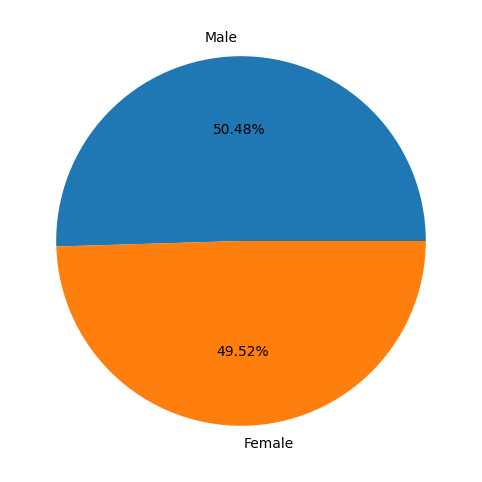

In [77]:
# pie chart
plt.pie(x=df['gender'].value_counts().values, labels=df['gender'].value_counts().index, autopct='%1.2f%%')


**1.4.2 `sr_citizen` feature**

([<matplotlib.patches.Wedge at 0x7899b39553a0>,
 [Text(-0.9603414716655103, 0.5364179879527924, 'No'),
  Text(0.9603413906686367, -0.5364181329603142, 'Yes')],
 [Text(-0.5238226209084601, 0.2925916297924322, '83.79%'),
  Text(0.5238225767283472, -0.29259170888744407, '16.21%')])

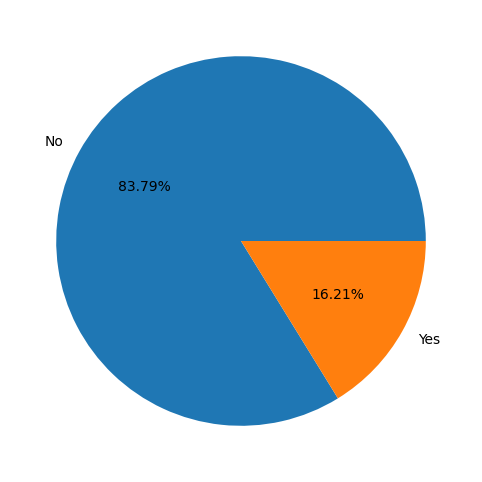

In [78]:
# pie chart
plt.pie(x=df['sr_citizen'].value_counts().values, labels=df['sr_citizen'].value_counts().index, autopct='%1.2f%%')

**1.4.3 `tenure` feature**

<Axes: xlabel='tenure'>

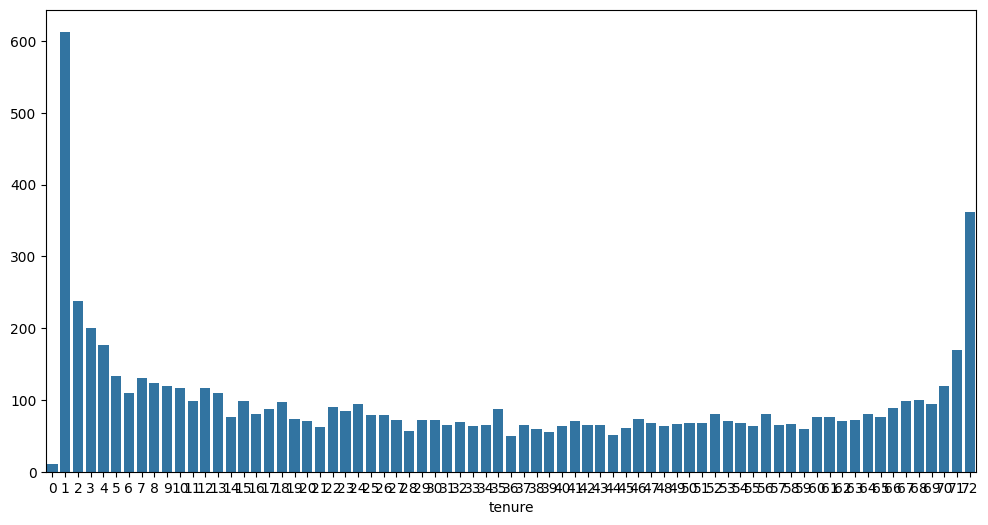

In [79]:
## barplot
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x=df['tenure'].value_counts().index, y=df['tenure'].value_counts().values)

([<matplotlib.patches.Wedge at 0x7899b3b80b00>,
 [Text(0.3863087312746102, 1.029934737806722, '1'),
  Text(-1.0999978505719346, 0.00217456596225627, '72'),
  Text(-0.4146645604379863, -1.0188490085958626, '2'),
  Text(0.5074145664529696, -0.9759766686511235, '3'),
  Text(1.0340746807246064, -0.37508606303660963, '4')],
 [Text(0.2107138534225146, 0.5617825842582119, '38.58%'),
  Text(-0.5999988275846915, 0.00118612688850342, '22.78%'),
  Text(-0.22618066932981068, -0.5557358228704704, '14.98%'),
  Text(0.27677158170161975, -0.53235091017334, '12.59%'),
  Text(0.5640407349406944, -0.20459239801996887, '11.08%')])

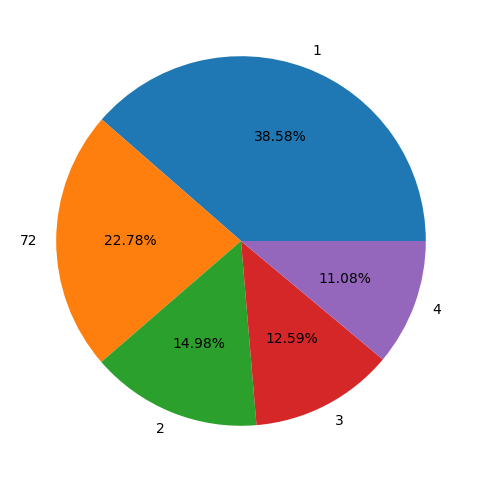

In [80]:
# pie chart : Top 5 tenure
plt.pie(x=df['tenure'].value_counts()[:5].values, labels=df['tenure'].value_counts()[:5].index, autopct='%1.2f%%')

In [81]:
df['tenure'].value_counts()[-3:]

,count
tenure,
44,51
36,50
0,11


**1.4.4 churn feature**



([<matplotlib.patches.Wedge at 0x7899b310d3a0>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.46%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.54%')])

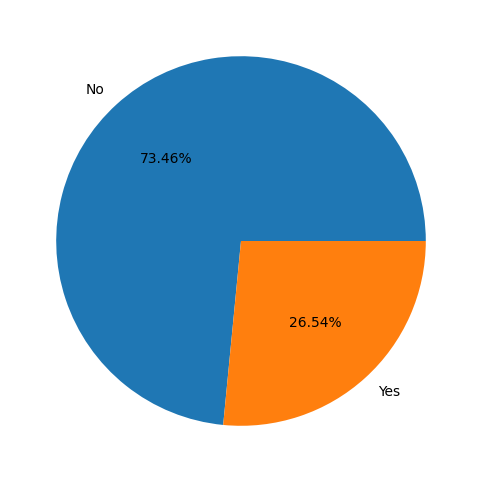

In [82]:
# pie chart
plt.pie(x=df['churn'].value_counts().values, labels=df['churn'].value_counts().index, autopct='%1.2f%%')

###**Univariate Analysis: Summary**

With the help of above pie chars and bar plots following is understood.

1. `gender`: There are **almost equal** number of **Male** and **Female** customers.

2. `sr_citizen`: There are approximately **16%** senior citizen customers.

3. `tenure`: **Maximum customers** are with **1 month** tenure. followed by **72 months** and **3 months**. **Least customers** are with **0 month** tenure followed by **36 months** and **44 months**.

4. `churn`: The churn is **26.54%**.

###**1.5 Bivariate Analysis - Distribution of gender, senior_citizen, tenure, churn features**

**1.5.1 `churn` vs. `contract`**

In [83]:
df['contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [84]:
contract_churn=df.groupby(['contract','churn']).size().reset_index().rename(columns={0:'count'})

<Axes: xlabel='contract', ylabel='count'>

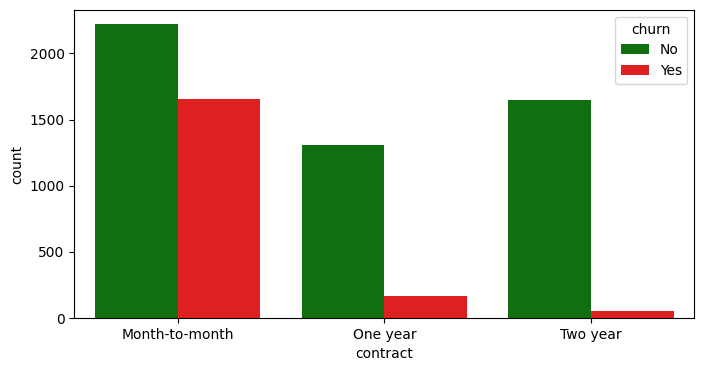

In [85]:
matplotlib.rcParams['figure.figsize']=(8,4)
sns.barplot(x='contract', y='count', hue='churn',data=contract_churn, palette=['Green','Red'])

**1.5.2 `churn` vs. `payment_method`**

In [86]:
df['payment_method'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [87]:
df['payment_method'].value_counts()

,count
payment_method,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [88]:
df.groupby(['payment_method','churn']).size()

payment_method             churn
Bank transfer (automatic)  No       1286
                           Yes       258
Credit card (automatic)    No       1290
                           Yes       232
Electronic check           No       1294
                           Yes      1071
Mailed check               No       1304
                           Yes       308
dtype: int64

In [89]:
payment_type_churn = df.groupby(['payment_method','churn']).size().reset_index().rename(columns={0:'count'})

<Axes: xlabel='payment_method', ylabel='count'>

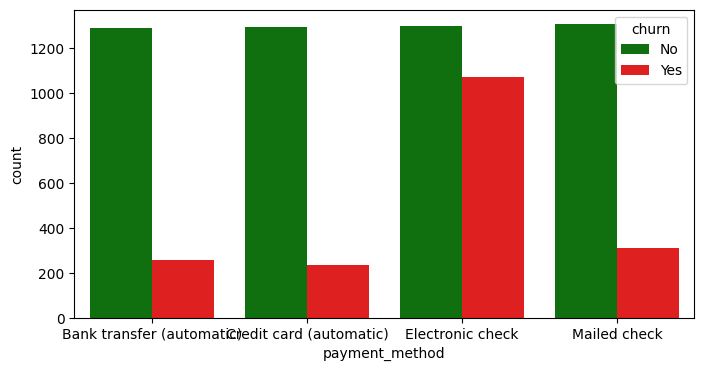

In [90]:
sns.barplot(x='payment_method', y='count', data=payment_type_churn,hue='churn', palette=['Green', 'Red'])

**1.5.3 `churn` vs. `gender`**

<Axes: xlabel='gender', ylabel='count'>

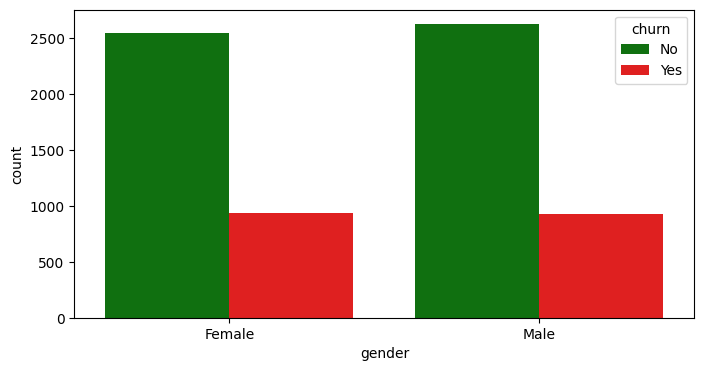

In [91]:
gender_churn = df.groupby(['gender','churn']).size().reset_index().rename(columns={0:'count'})
sns.barplot(x='gender', y='count', data=gender_churn,hue='churn', palette=['Green', 'Red'])

**1.5.4 `churn` vs. `tenure`**

<Axes: xlabel='tenure', ylabel='count'>

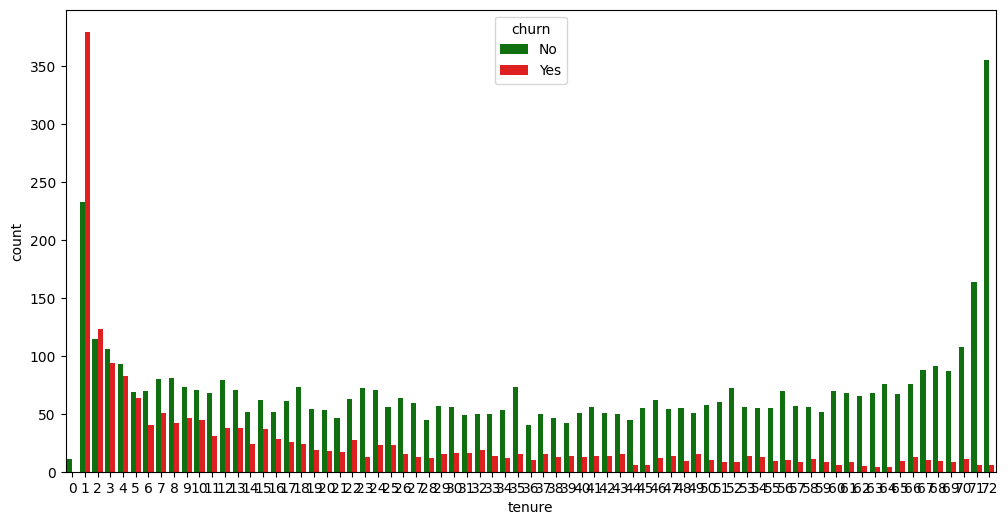

In [92]:
tenure_churn = df.groupby(['tenure','churn']).size().reset_index().rename(columns={0:'count'})
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='tenure', y='count', data=tenure_churn,hue='churn', palette=['Green', 'Red'])

**1.5.5 `churn` vs. `phone_service`**

<Axes: xlabel='phone_service', ylabel='count'>

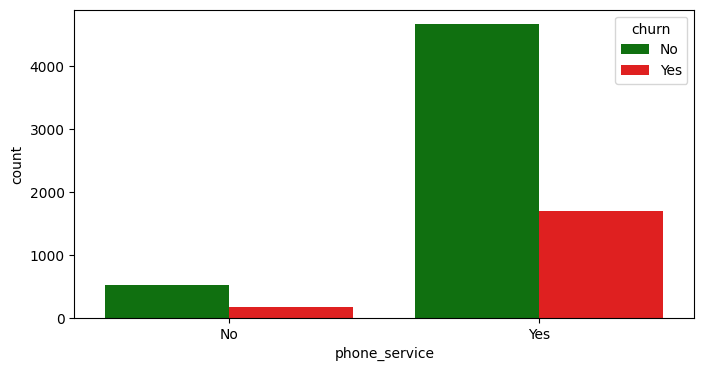

In [93]:
phone_service_churn = df.groupby(['phone_service','churn']).size().reset_index().rename(columns={0:'count'})
matplotlib.rcParams['figure.figsize']=(8,4)
sns.barplot(x='phone_service', y='count', data=phone_service_churn,hue='churn', palette=['Green', 'Red'])

**1.5.6 `churn` vs. `multiple_lines`**

<Axes: xlabel='multiple_lines', ylabel='count'>

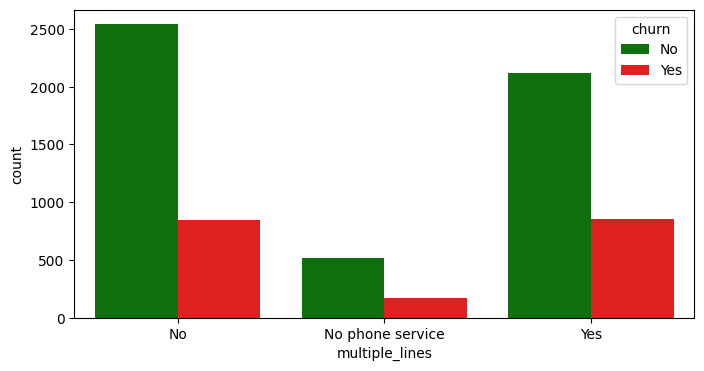

In [94]:
multiple_lines_churn = df.groupby(['multiple_lines','churn']).size().reset_index().rename(columns={0:'count'})
sns.barplot(x='multiple_lines', y='count', data=multiple_lines_churn,hue='churn', palette=['Green', 'Red'])

**1.5.7 `churn` vs. `internet_service`**

<Axes: xlabel='internet_service', ylabel='count'>

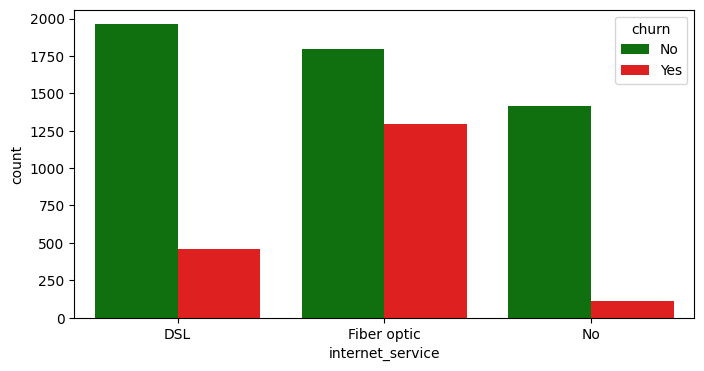

In [95]:
internet_service_churn = df.groupby(['internet_service','churn']).size().reset_index().rename(columns={0:'count'})
sns.barplot(x='internet_service', y='count', data=internet_service_churn,hue='churn', palette=['Green', 'Red'])


###**Bivariate Analysis: Summary**

With the help of above bar plots following is understood.

1. `churn` vs. `contract`: Customer with **Month-to-month** contract has **high churing**.  

2. `churn` vs `payment_method`: Customer with **Electronic check** payment method has **high churning**.

3. `churn` vs. `gender`: **No significant** role of `gender` is observed in churning.

4. `churn` vs `tenure`: There is **extremely high** churning for customers with small tenure (eg. tenure 1, 2,3  etc.), which gradually **decreases as long as tenure increases**.

5. `churn` vs `phone_service`: **No significant** role of `gender` is observed in churning.

6. `churn` vs `multiple_lines`: **No significant** role of `gender` is observed in churning.

7. `churn` vs `internet_service`: Churning is higher for internet users who uses **Fiber optic**.

###**1.6 Correlation Heatmap (For numeric features)**

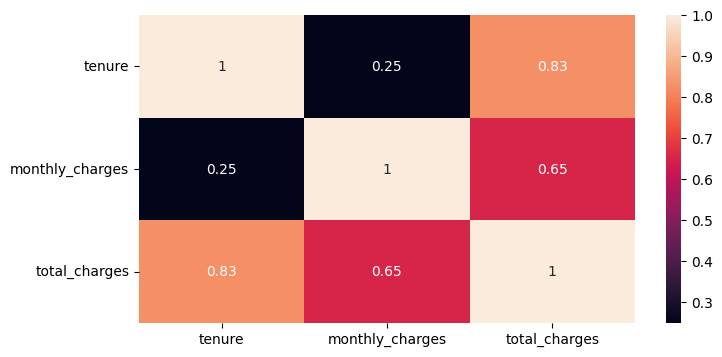

In [96]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.rcParams['figure.figsize'] = (20,7)
plt.show()

###**Correlation Heatmap (For numeric features): Observation**

From the correlation heatmap (for numeric features) generated using `heatmap` and `corr` procedures, following were observed:-

1. `total_charges` is significantly positively correlated with `tenure` and minutely correlated with `monthly_charges`.

Note: Above correlation is limited to numeric features only as per client requirement. Other **categorical features** should be converted to **numeric** for further analysis.

###**1.7 Top 3 Churn Risk Patterns**

1. **Short Tenure**: Extremely high churning has been observed for the customers with small tenure (eg. tenure 1, 2,3 etc.). Churning gradually decreases with the increase of tenure.

2. **Monthly Contract**: Customer which has **Month-to-month** contract has **high churing**.  

3. **Electronic check payment method**: High churning was also observed for customer who has opted for  **Electronic check** payment method.

4. **Fiber optic internet_service**: In addition to above, there is also high churning for internet users who uses **Fiber optic**.

Note: Further analysis is required for confirmation of above risk for churning.